In [295]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Testing on first dataset

This line creates a synthetic dataset with 1000 data points arranged in two moon-shaped clusters.
Because the noise value is very high (0.8), the points get heavily scattered, so instead of clear moon shapes, the data looks like a random ball of points.

In [297]:
x,y = make_moons(n_samples=1000 , noise=.8)

This line plots the data points on a 2D graph.

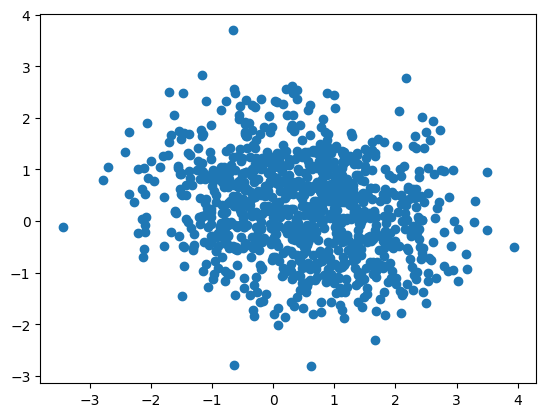

In [298]:
plt.scatter(x[:,0] , x[:,1])

First line creates a K-Means model with 4 clusters and better centroid initialization (k-means++).
Second line fits the model on x and assigns a cluster label to each data point.

In [299]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=30)
K_means_label =  kmeans.fit_predict(x)

In [300]:
silhouette_score(x, K_means_label)

0.32824357392623826

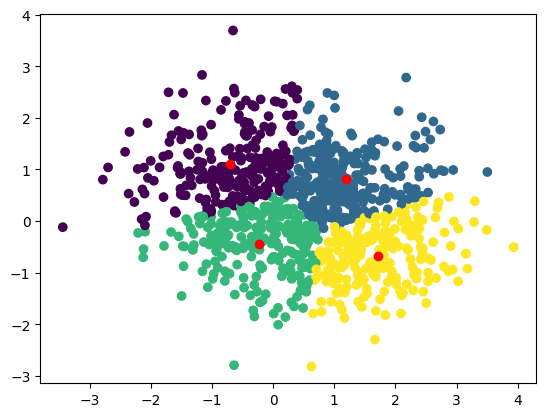

In [301]:
cent = kmeans.cluster_centers_
plt.scatter(x[:,0] , x[:,1],c= K_means_label)
plt.scatter(cent[:,0] , cent[:,1] , c = 'red')

First line creates a DBSCAN model where points within distance 0.40 are considered neighbors and at least 4 points are needed to form a cluster.
Second line fits DBSCAN on x and assigns a cluster label to each point (with -1 for noise points).

In [290]:
dbscan = DBSCAN(eps=.40 , min_samples=4)
db_label = dbscan.fit_predict(x)

In [291]:
silhouette_score(x, db_label)

0.3338943983691919

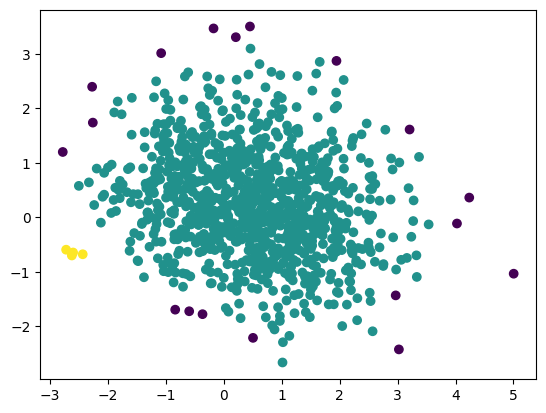

In [292]:
plt.scatter(x[:,0] , x[:,1] , c = db_label)

Testing on second dataset

This line generates a synthetic dataset with 300 data points grouped into 4 blob-shaped clusters.
cluster_std = 0.60 controls how spread out each cluster is, and random_state = 30 ensures the same data is generated every time.

In [226]:
x1,y1 = make_blobs(n_samples=300 , centers=4 , cluster_std=.60 , random_state=30)

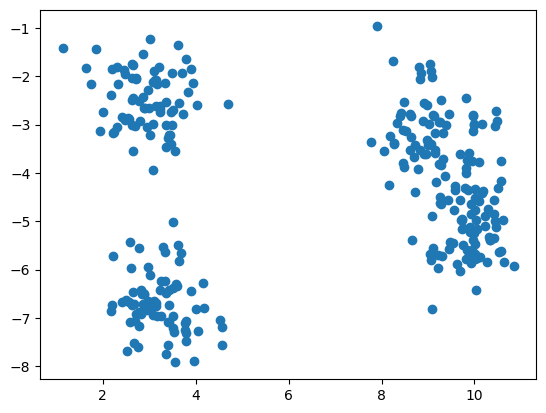

In [227]:
plt.scatter(x1[:,0] ,x1[:,1])

In [210]:
kmeans1 = KMeans(n_clusters=3, init='k-means++',random_state=42)
K_means_label_1 =  kmeans1.fit_predict(x1)

This code is used to find the optimal number of clusters using the Elbow Method.

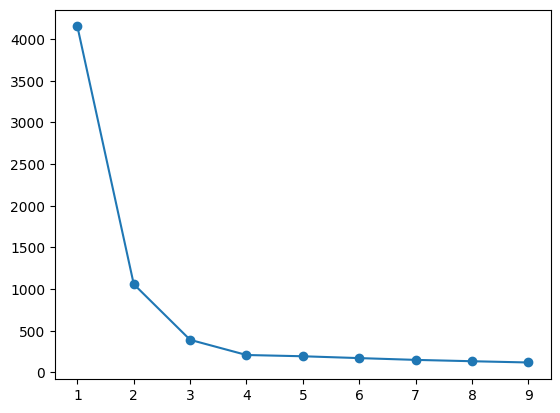

In [228]:
inertia = []
k = range(1,10)
for n in k :
    km = KMeans(n_clusters=n,init='k-means++')
    km.fit(x1)
    inertia.append(km.inertia_)
plt.plot(k,inertia,marker='o')

In [211]:
silhouette_score(x1, K_means_label_1)

0.7420389169641666

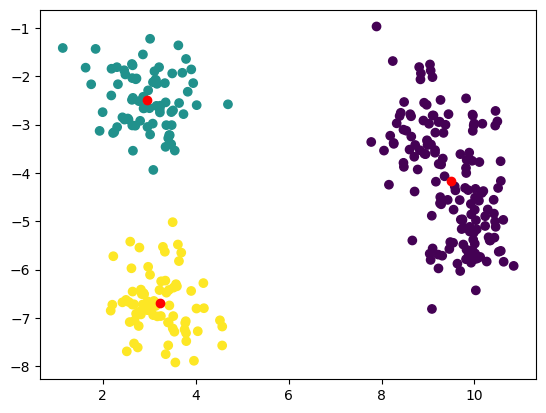

In [212]:
cent = kmeans1.cluster_centers_
plt.scatter(x1[:,0] , x1[:,1], c= K_means_label_1)
plt.scatter(cent[:,0] , cent[:,1] , c = 'red')

In [213]:
dbscan1 = DBSCAN(eps=.60 , min_samples=3)
db_label_1 = dbscan1.fit_predict(x1)

In [214]:
silhouette_score(x1, db_label_1 )

0.6907773391828868

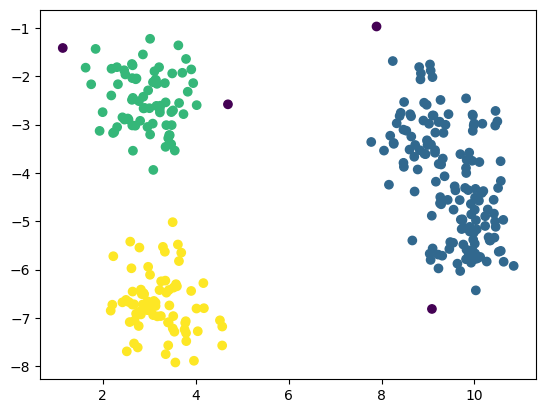

In [215]:
plt.scatter(x1[:,0] , x1[:,1] , c = db_label_1)

Testing on first dataset

This line loads a dataset from an online CSV file into a Pandas DataFrame.

In [216]:
df = pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv')

In [217]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


First line selects Annual Income and Spending Score columns from the dataset and converts them into a numerical array x2.
Next, StandardScaler is used to standardize the features, so both columns have mean 0 and standard deviation 1, which helps clustering work properly.

In [218]:
x2 = df[['Annual Income (k$)','Spending Score (1-100)']].values

scaler =  StandardScaler()
x2 = scaler.fit_transform(x2)

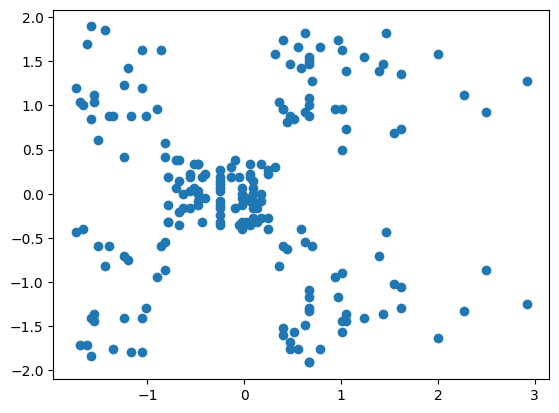

In [219]:
plt.scatter(x2[:,0] , x2[:,1])

In [220]:
dbscan2 = DBSCAN(eps=.4 , min_samples=5)
db_label_2 = dbscan2.fit_predict(x2)

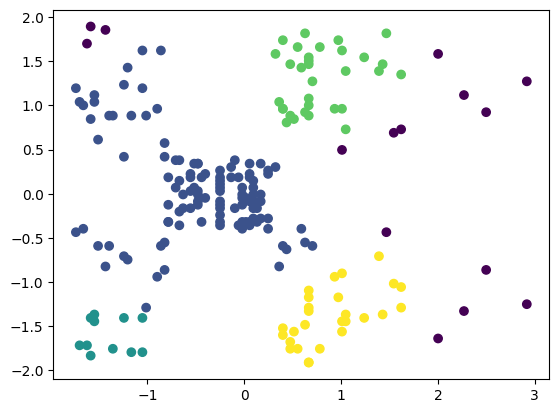

In [221]:
plt.scatter(x2[:,0] , x2[:,1],c= db_label_2)

In [222]:
silhouette_score(x2, db_label_2)

0.41325830390002166

In [241]:
kmeans2 = KMeans(n_clusters=6, init='k-means++',random_state=42)
K_means_label_2 =  kmeans2.fit_predict(x2)

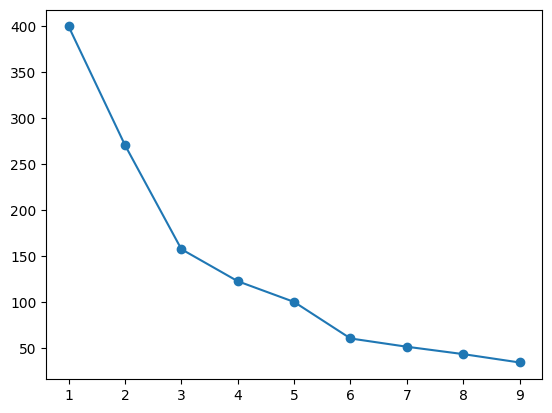

In [245]:
inertia = []
k = range(1,10)
for n in k :
    km = KMeans(n_clusters=n,init='k-means++')
    km.fit(x2)
    inertia.append(km.inertia_)
plt.plot(k,inertia,marker='o')

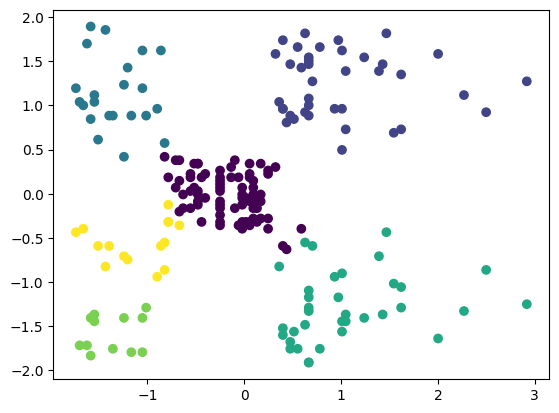

In [242]:
plt.scatter(x2[:,0] , x2[:,1],c= K_means_label_2 )

In [243]:
silhouette_score(x2, K_means_label_2)

0.5138257534676561

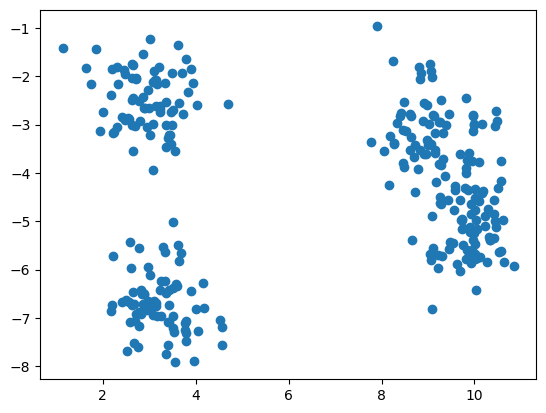

In [246]:
plt.scatter(x1[:,0] , x1[:,1])

HC clustering 

In [247]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [248]:
linkage_clustering = linkage(x,method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [20.0, 20.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [70.0, 70.0, 85.0, 85.0],
  [35.0, 35.0, 77.5, 77.5],
  [95.0, 95.0, 105.0, 105.0],
  [100.0, 100.0, 115.0, 115.0],
  [107.5, 107.5, 125.0, 125.0],
  [56.25, 56.25, 116.25, 116.25],
  [135.0, 135.0, 145.0, 145.0],
  [140.0, 140.0, 155.0, 155.0],
  [86.25, 86.25, 147.5, 147.5],
  [165.0, 165.0, 175.0, 175.0],
  [170.0, 170.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [177.5, 177.5, 200.0, 200.0],
  [188.75, 188.75, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [230.0, 230.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [237.5, 237.5, 260.0, 260.0],
  [201.875, 201.875, 248.75, 248.75],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [300.0, 300.0, 315.0, 315.0],
  [280.0, 280.0, 307.5, 307.5],
  [325.0, 325.0, 335.0, 335.0],
  [330.0, 330.0, 345.0, 345.0],
  [293.75, 293.75, 337.5

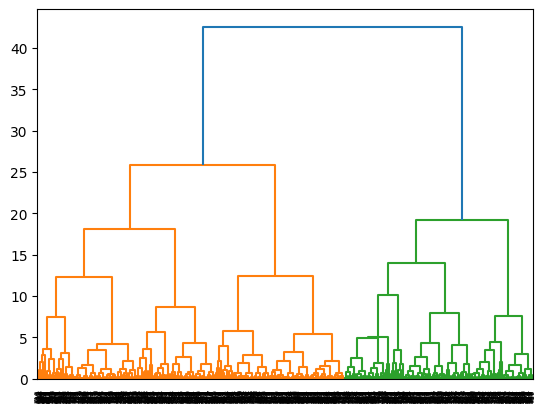

In [249]:
dendrogram(linkage_clustering,orientation='top',distance_sort='descending',show_leaf_counts=True)

In [250]:
hc = fcluster(linkage_clustering,3 , criterion='maxclust')